In [1]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cef_regression import *


In [5]:
CEF_TICKER = "EOS"

In [7]:
# run only if changes to TRAIN_DATA_RATIO, AVERAGES_CALC_PERIOD, START_DATE etc.
# take minutes to calculate depending on START_DATE
calculate_cef_data(CEF_TICKER, START_DATE, AVERAGES_CALC_PERIOD)

Processing data ... Please wait ...


/home/hristocr/Programming/cef_regress_model/cef_regression.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  cef[PREM_DISC_COL_NAME] = (cef[PRICE_COL_NAME] - cef[NAV_COL_NAME]) / cef[NAV_COL_NAME] * 100
/home/hristocr/anaconda3/envs/jupyter-notebook/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/hristocr/anaconda3/envs/jupyter-notebook/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying 

Data processing finished!


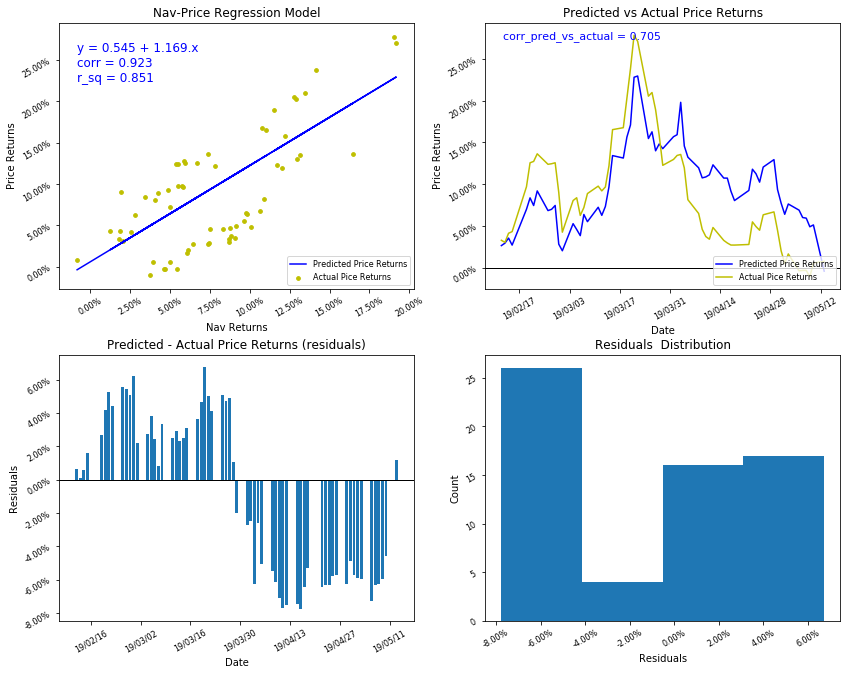

In [8]:
cef = read_processed_cef_data(CEF_TICKER)
cef_train_data, cef_test_data = split_train_test_data(cef, TRAIN_DATA_RATIO)

regress_data, regress_statistics = analyze_regression(cef_train_data, cef_test_data, NAV_RETURNS_COL_NAME,
                                                      PRICE_RETURNS_COL_NAME)
plot_regress_result(regress_data, regress_statistics)

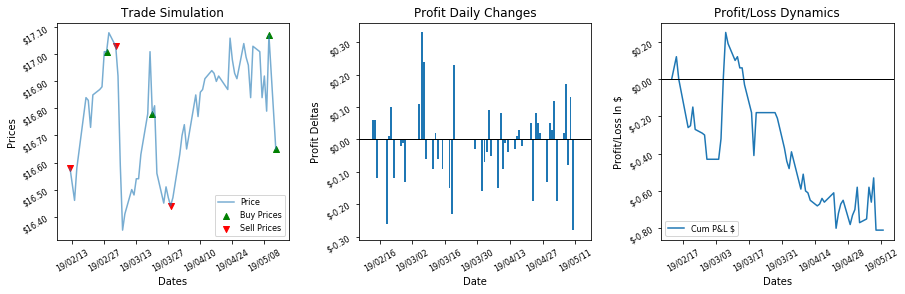

        Date  Price  Res Z-score       Action HP (days) P&L Delta $ Cum P&L $
0 2019-02-12  16.58         1.92   SELL_SHORT         0           0         0
1 2019-02-28  17.01        -0.47  COVER_SHORT        16       -0.43     -0.43
2 2019-03-04  17.03         1.05   SELL_SHORT         0           0     -0.43
3 2019-03-20  16.78        -0.19  COVER_SHORT        16        0.25     -0.18
4 2019-03-28  16.44         1.91   SELL_SHORT         0           0     -0.18
5 2019-05-10  17.07        -0.13  COVER_SHORT        43       -0.63     -0.81
6 2019-05-13  16.65        -1.78     BUY_LONG         0           0     -0.81
         Date  Price P&L Delta $ Cum P&L $
0  2019-02-12  16.58           0         0
1  2019-02-13  16.52        0.06      0.06
2  2019-02-14  16.46        0.06      0.12
3  2019-02-15  16.58       -0.12      0.00
4  2019-02-19  16.84       -0.26     -0.26
5  2019-02-20  16.83        0.01     -0.25
6  2019-02-21  16.73        0.10     -0.15
7  2019-02-22  16.85       -0.12

In [9]:
cef_simul_data = cef[[DATE_COL_NAME, PRICE_COL_NAME, PRICE_RETURNS_COL_NAME, NAV_RETURNS_COL_NAME]]
simulation_start_date = cef_test_data[DATE_COL_NAME].values[0]
cef_simul_data = calculate_residual_zscores(cef_simul_data, simulation_start_date, AVERAGES_CALC_PERIOD)
	
trades, continuos_profits = run_trade_simulation(cef_simul_data)
plot_trade_simuation(trades, continuos_profits)
print(trades)
print(continuos_profits)

# Regressing NAV-Price Returns for pricing Closed-End Funds based on extreme residual values.
Hristo T. Raykov  
email: hristocr@gmail.com

## Abstract

## Keywords
Closed-End Funds, Returns, NAV, Premium/Discounts,  Regression, Z-Score, Residuals

## 1. Introduction
Problem Statement

## 2. Literature Review
Previous research

## 3. Methods
Gathering / generating, cleaning, and formatting data. How the research was done. Form a hypothesis.  
Data  
Regression  
etc...

## 4. Results 
Testing and visualization. Report what you actually found. Test the hypothesis with an experiment.

## 5. Discussion
Interpret your findings for the reader in relation to previous research and the literature as a whole.

## 6. Conclusion
Communication. 

## References


